In [1]:
from glob import glob
import os
import random
from PIL import Image
from skimage.morphology import label
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from skimage.util import img_as_ubyte
np.random.seed(4)

# 100x

In [2]:
SyMBac_training_data_dir = "fluo/100x"
savedir = "omnipose_SyMBac_TD_fl/100x"

In [3]:
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))

In [4]:
img_shape = tifffile.imread(masks[0]).shape
print(img_shape)

(256, 46)


In [5]:
tile_length = 40
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.

In [7]:
os.mkdir(savedir)
for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

In [8]:
conv_tile.max()

255

Text(0.5, 1.0, 'Synthetic data')

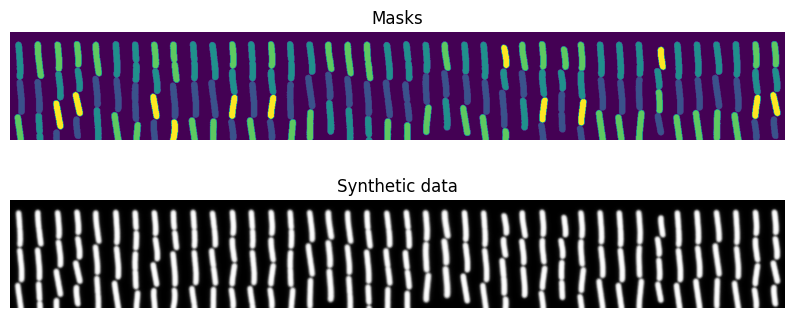

In [9]:
fig, axs = plt.subplots(2, figsize=(10,4))
axs[0].imshow(mask_tile)
axs[1].imshow(conv_tile, cmap="Greys_r")
for ax in axs:
    ax.axis("off")
axs[0].set_title("Masks")
axs[1].set_title("Synthetic data")

In [10]:
!python -m omnipose --train --use_gpu --dir "C:\Users\\robho\OneDrive\Desktop\Uni Work\Year 4\project2\omnipose_SyMBac_TD_fl\\100x" --mask_filter "_masks" --n_epochs 500 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

2023-01-23 21:55:34,785 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-01-23 21:55:35,287 [INFO] ** TORCH GPU version installed and working. **
2023-01-23 21:55:35,287 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-01-23 21:55:35,287 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-01-23 21:55:36,133 [INFO] not all flows are present, will run flow generation for all images
200 ['C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\100x\\train_00000_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\100x\\train_00001_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\100x\\train_00002_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\o

# 60x

In [18]:
SyMBac_training_data_dir = "fluo/60x"
savedir = "omnipose_SyMBac_TD_fl/60x"

In [19]:
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))

In [20]:
img_shape = tifffile.imread(masks[0]).shape
print(img_shape)

(256, 46)


In [21]:
tile_length = 40
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.

In [22]:
os.mkdir(savedir)
for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

Text(0.5, 1.0, 'Synthetic data')

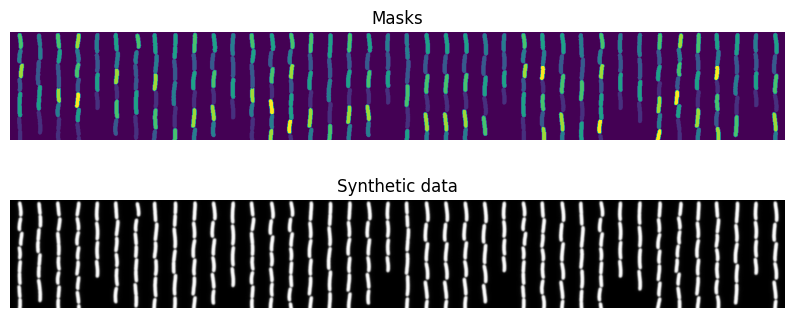

In [23]:
fig, axs = plt.subplots(2, figsize=(10,4))
axs[0].imshow(mask_tile)
axs[1].imshow(conv_tile, cmap="Greys_r")
for ax in axs:
    ax.axis("off")
axs[0].set_title("Masks")
axs[1].set_title("Synthetic data")

In [28]:
!python -m omnipose --train --use_gpu --dir "C:\Users\\robho\OneDrive\Desktop\Uni Work\Year 4\project2\omnipose_SyMBac_TD_fl\\60x" --mask_filter "_masks" --n_epochs 4000 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

2023-01-19 22:31:16,894 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-01-19 22:31:17,389 [INFO] ** TORCH GPU version installed and working. **
2023-01-19 22:31:17,389 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-01-19 22:31:17,390 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-01-19 22:31:18,235 [INFO] not all flows are present, will run flow generation for all images
200 ['C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\60x\\train_00000_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\60x\\train_00001_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\60x\\train_00002_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omni

# 40x

In [36]:
SyMBac_training_data_dir = "fluo/40x"
savedir = "omnipose_SyMBac_TD_fl/40x"

In [37]:
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))

In [38]:
convs

['fluo/40x/convolutions\\synth_00000.tif',
 'fluo/40x/convolutions\\synth_00001.tif',
 'fluo/40x/convolutions\\synth_00002.tif',
 'fluo/40x/convolutions\\synth_00003.tif',
 'fluo/40x/convolutions\\synth_00004.tif',
 'fluo/40x/convolutions\\synth_00005.tif',
 'fluo/40x/convolutions\\synth_00006.tif',
 'fluo/40x/convolutions\\synth_00007.tif',
 'fluo/40x/convolutions\\synth_00008.tif',
 'fluo/40x/convolutions\\synth_00009.tif',
 'fluo/40x/convolutions\\synth_00010.tif',
 'fluo/40x/convolutions\\synth_00011.tif',
 'fluo/40x/convolutions\\synth_00012.tif',
 'fluo/40x/convolutions\\synth_00013.tif',
 'fluo/40x/convolutions\\synth_00014.tif',
 'fluo/40x/convolutions\\synth_00015.tif',
 'fluo/40x/convolutions\\synth_00016.tif',
 'fluo/40x/convolutions\\synth_00017.tif',
 'fluo/40x/convolutions\\synth_00018.tif',
 'fluo/40x/convolutions\\synth_00019.tif',
 'fluo/40x/convolutions\\synth_00020.tif',
 'fluo/40x/convolutions\\synth_00021.tif',
 'fluo/40x/convolutions\\synth_00022.tif',
 'fluo/40x/

In [39]:
img_shape = tifffile.imread(convs[0]).shape
print(img_shape)

(128, 23)


In [40]:
tile_length = 40
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.

In [42]:
os.mkdir(savedir)
for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

Text(0.5, 1.0, 'Synthetic data')

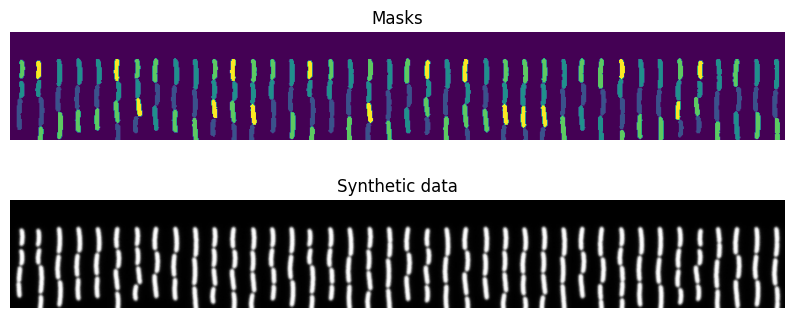

In [43]:
fig, axs = plt.subplots(2, figsize=(10,4))
axs[0].imshow(mask_tile)
axs[1].imshow(conv_tile, cmap="Greys_r")
for ax in axs:
    ax.axis("off")
axs[0].set_title("Masks")
axs[1].set_title("Synthetic data")

In [44]:
!python -m omnipose --train --use_gpu --dir "C:\Users\\robho\OneDrive\Desktop\Uni Work\Year 4\project2\omnipose_SyMBac_TD_fl\\40x" --mask_filter "_masks" --n_epochs 4000 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

# 35x

In [2]:
SyMBac_training_data_dir = "fluo/35x"
savedir = "omnipose_SyMBac_TD_fl/35x"

In [3]:
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))

In [4]:
tile_length = 40
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.

In [5]:
os.mkdir(savedir)
for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

Text(0.5, 1.0, 'Synthetic data')

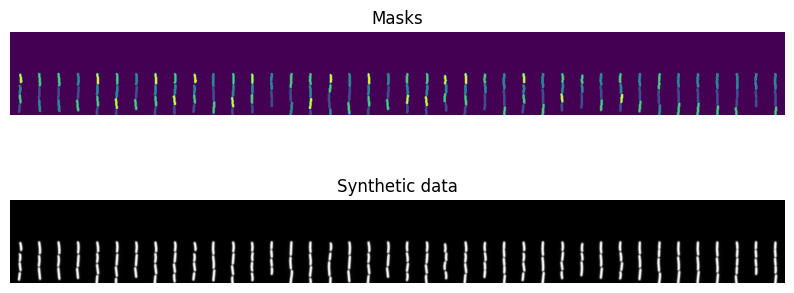

In [6]:
fig, axs = plt.subplots(2, figsize=(10,4))
axs[0].imshow(mask_tile)
axs[1].imshow(conv_tile, cmap="Greys_r")
for ax in axs:
    ax.axis("off")
axs[0].set_title("Masks")
axs[1].set_title("Synthetic data")

In [7]:
!python -m omnipose --train --use_gpu --dir "C:\Users\\robho\OneDrive\Desktop\Uni Work\Year 4\project2\omnipose_SyMBac_TD_fl\\35x" --mask_filter "_masks" --n_epochs 4000 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

2023-01-22 19:43:24,907 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-01-22 19:43:25,524 [INFO] ** TORCH GPU version installed and working. **
2023-01-22 19:43:25,524 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-01-22 19:43:25,524 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-01-22 19:43:25,896 [INFO] not all flows are present, will run flow generation for all images
200 ['C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\35x\\train_00000_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\35x\\train_00001_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\35x\\train_00002_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omni

# 30x

In [14]:
SyMBac_training_data_dir = "fluo/30x"
savedir = "omnipose_SyMBac_TD_fl/30x"
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))
tile_length = 40
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.
os.mkdir(savedir)
for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

In [15]:
!python -m omnipose --train --use_gpu --dir "C:\Users\\robho\OneDrive\Desktop\Uni Work\Year 4\project2\omnipose_SyMBac_TD_fl\\30x" --mask_filter "_masks" --n_epochs 500 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

2023-01-24 08:30:54,187 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-01-24 08:30:54,666 [INFO] ** TORCH GPU version installed and working. **
2023-01-24 08:30:54,666 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-01-24 08:30:54,666 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-01-24 08:30:54,973 [INFO] not all flows are present, will run flow generation for all images
200 ['C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\30x\\train_00000_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\30x\\train_00001_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\30x\\train_00002_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omni

# 25x

In [16]:
SyMBac_training_data_dir = "fluo/25x"
savedir = "omnipose_SyMBac_TD_fl/25x"
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))
tile_length = 40
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.
os.mkdir(savedir)
for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

In [17]:
!python -m omnipose --train --use_gpu --dir "C:\Users\\robho\OneDrive\Desktop\Uni Work\Year 4\project2\omnipose_SyMBac_TD_fl\\25x" --mask_filter "_masks" --n_epochs 500 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

2023-01-24 10:52:14,166 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-01-24 10:52:14,635 [INFO] ** TORCH GPU version installed and working. **
2023-01-24 10:52:14,635 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-01-24 10:52:14,635 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-01-24 10:52:14,871 [INFO] not all flows are present, will run flow generation for all images
200 ['C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\25x\\train_00000_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\25x\\train_00001_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\25x\\train_00002_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omni

# 20x

In [18]:
SyMBac_training_data_dir = "fluo/20x"
savedir = "omnipose_SyMBac_TD_fl/20x"
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))
tile_length = 40
training_samples = 200
indices = random.sample(range(len(masks)-tile_length), training_samples)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.
os.mkdir(savedir)
for i, x in enumerate(indices):
    x = indices[i]
    mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

In [19]:
!python -m omnipose --train --use_gpu --dir "C:\Users\\robho\OneDrive\Desktop\Uni Work\Year 4\project2\omnipose_SyMBac_TD_fl\\20x" --mask_filter "_masks" --n_epochs 500 --pretrained_model None --save_every 100 --save_each --learning_rate 0.1 --diameter 0 --batch_size 16

2023-01-24 13:21:10,847 [INFO] No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2023-01-24 13:21:11,344 [INFO] ** TORCH GPU version installed and working. **
2023-01-24 13:21:11,344 [INFO] >>>> using GPU
Omnipose enabled. See Omnipose repo for licencing details.
2023-01-24 13:21:11,344 [INFO] Training omni model. Setting nclasses=4, RAdam=True
2023-01-24 13:21:11,557 [INFO] not all flows are present, will run flow generation for all images
200 ['C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\20x\\train_00000_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\20x\\train_00001_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omnipose_SyMBac_TD_fl\\20x\\train_00002_masks.png', 'C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2\\omni